In [1]:
# Load packages
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import packages
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text,inspect, func

In [4]:
# Created engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
# For measurement table
measurement = Base.classes.measurement
# For station table
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Displayed the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

            Precipitation
Date                     
2016-08-23           0.00
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70


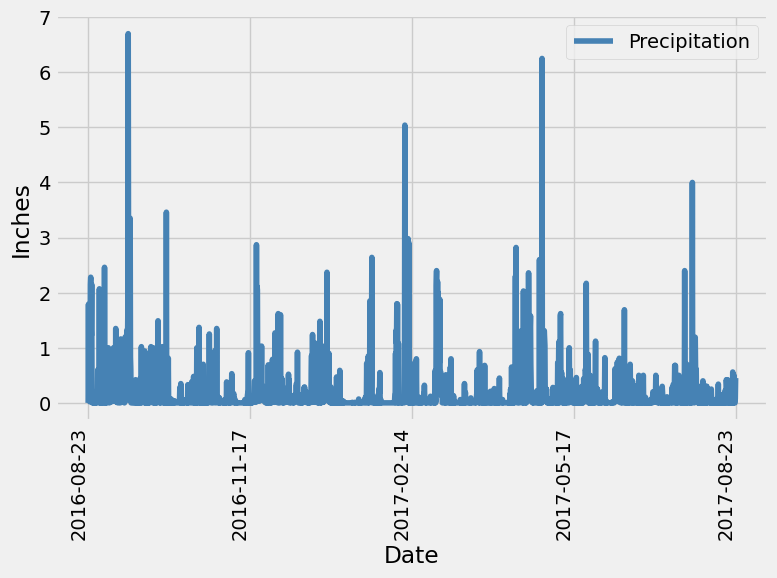

In [41]:
# Retrieve the data
data = engine.connect().execute(
# Selected Date and PRCP as Precipitation only
# Added a where clause to filter data after 2016-08-23 to get the past 12 months of data
    text("SELECT Date, PRCP as Precipitation FROM measurement WHERE Date >= '2016-08-23'")
).fetchall()
rain = pd.DataFrame(data, columns=['Date', 'Precipitation']) # Convert results into a dataframe
rain = rain.sort_values(by='Date') # Sort Dataframe by date
rain.set_index('Date', inplace=True) # Set date as index
rain.dropna(inplace=True)  # Drop rows with null values

print(rain.head())  # Displayed Data

# Plotting
rain.plot(
    kind='line',        # Specifying the type of plot i.e., a line
    figsize=(8, 6),    # Formatting the chart size
    color='steelblue'   # Formatting the plot color
)

plt.xlabel("Date")  # Label for x-axis
plt.ylabel("Inches")  # Label for y-axis

# Limit x-axis labels to a subset of dates
num_labels = 4  # Number of x-axis labels to display
x_axis_positions = list(range(0, len(rain.index), max(len(rain.index) // num_labels, 1)))  # Distributing the labels across the x-axis
x_axis_labels = [rain.index[i] for i in x_axis_positions]  # Retreive the dates for the x-axis labels

plt.gca().set_xticks(x_axis_positions)  # Positioning the x-axis labels
plt.gca().set_xticklabels(x_axis_labels, rotation=90, ha='right')  # Rotate x-axis labels by 90 degrees

plt.tight_layout()  # Compress layout for better spacing and readability
plt.show()  # Display the line chart

In [11]:
# Retrieving precipitation data for the past 12 months
data_stat = engine.connect().execute(text("SELECT prcp as Precipitation FROM measurement where date >= '2016-08-23'")).fetchall()
# Set data into Dataframe
stat_data = pd.DataFrame(data_stat, columns=['precipitation'])
# Calcalculated the summary statitics for the precipitation data
stat_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Retrieved data on the total number of stations
station_count = engine.connect().execute(text("SELECT count(distinct station) FROM measurement")).fetchall()
# Displayed results
station_count


[(9,)]

In [13]:
# Retrieved the total number of active stations in the data set. 
active_station_count = engine.connect().execute(text("SELECT station, count(id) as ID_Count FROM measurement Group by station order by ID_COUNT desc")).fetchall()
# Displayed results
active_station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Retreived the lowest, highest and average temperature for the most active station. 
LMA_Station = engine.connect().execute(text("SELECT min(tobs) as Lowest_Temp, max(tobs) as Highest_Temp, avg(tobs) as Avg_Temp FROM measurement Where station = 'USC00519281'")).fetchall()
# Displayed results
LMA_Station

[(54.0, 85.0, 71.66378066378067)]

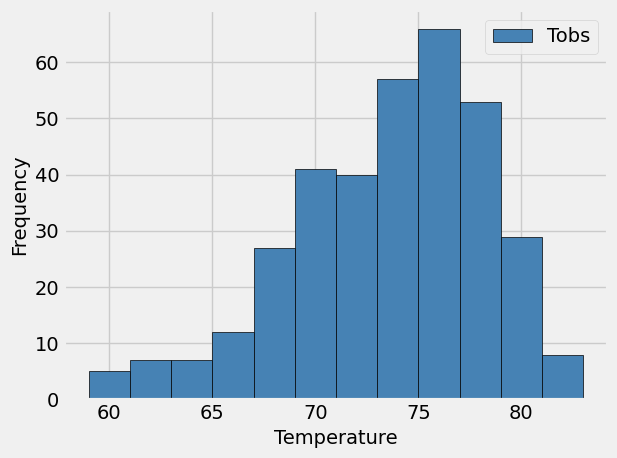

In [ ]:
# Retrieve the data
Temp = engine.connect().execute(
    text("SELECT Tobs as Temperature FROM measurement WHERE station = 'USC00519281' AND Date >= '2016-08-23'")
).fetchall()

# Convert result into a DataFrame
Temp_data = pd.DataFrame(Temp, columns=['Temperature'])

# Plotting the data as a histogram
plt.hist(Temp_data['Temperature'], bins=12, color='steelblue', edgecolor='black', label='Tobs')  # 12 bins for better distribution

# Formatting the labels
plt.xlabel('Temperature', fontsize=14)  # Label for x-axis
plt.ylabel('Frequency', fontsize=14)  # Label for y-axis

# Adding a legend
plt.legend(loc='upper right')

# Compress layout for better spacing and readability
plt.tight_layout()

# Display histogram
plt.show()

# Close Session

In [16]:
# Close Session
session.close()